In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("datasets/2021-2022/#stopaapihate2021-2022_rps_no_rtwt_toxic_hate.csv")

In [4]:
df[df["davidson"] > 0.5]

,tweet_id,date,text,name,username,userid,in_reply_to_tweet_id,in_reply_to_username,in_reply_to_userid,language,...,obscene,identity_attack,insult,threat,sexual_explicit,davidson,hateval,jigsaw,qian,ethos
24,1159239034339598337,2019-08-07T23:04:58.000Z,"@OliverG777 @Alyssa_Milano Each year, there ar...",Non-binary Person of Color,NonbinaryPoC,1054526736673648640,1.159237e+18,NaN,7.231726e+17,en,...,0.010446,0.612989,0.037927,0.006796,0.006127,0.915064,0.003107,0.026691,0.006161,0.000619
315,1184416083471519744,2019-10-16T10:29:34.000Z,@AshleeMPreston You racist homophobic shill. Y...,PlantBasedRiot,PlantRiot,1178177771308105734,1.183683e+18,AshleeMPreston,1.632962e+08,en,...,0.266859,0.297753,0.778553,0.003202,0.039257,0.840628,0.996886,0.998091,0.642737,0.999769
347,1187581782574583808,2019-10-25T04:08:55.000Z,Did you know that Black Dads are doing the bes...,Noirdos,noirdosser,1171231119364112384,NaN,NaN,NaN,en,...,0.001713,0.300871,0.020085,0.000884,0.000351,0.837340,0.404931,0.058005,0.983452,0.000232
464,1271863029140000768,2020-06-13T17:52:30.000Z,@CCUSAUSA @mattgaetz @TuckerCarlson Cancel Cul...,Andrew Goss 👊USAF👊,Goss30Goss,2869858477,1.271781e+18,CCUSAUSA,1.265941e+18,en,...,0.898854,0.011859,0.857985,0.000763,0.006460,0.614806,0.244455,0.995897,0.003684,0.002394
519,1272053443809722371,2020-06-14T06:29:09.000Z,@johnpavlovitz @mattgaetz @TuckerCarlson Surel...,Diane Slaton,malakofffish,25878814,1.271655e+18,johnpavlovitz,4.937150e+08,en,...,0.006229,0.002244,0.254925,0.000247,0.002023,0.914109,0.001180,0.000435,0.000987,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186050,1536897821672198144,2022-06-15T02:26:09.000Z,@tedfrank @Cernovich These white supremacists ...,Zero Apologies,Zer0Apologiez,1460779061697990665,1.536895e+18,tedfrank,1.655652e+07,en,...,0.010392,0.896610,0.165422,0.009561,0.001794,0.769981,0.988651,0.996516,0.036010,0.000420
186324,1541500794842714112,2022-06-27T19:16:43.000Z,@lowloop @neneking333 @libsoftiktok No no! Jus...,T,T90593794,1367891819321724930,1.463000e+18,lowloop,1.191565e+18,en,...,0.003209,0.510033,0.046033,0.001375,0.000551,0.910317,0.995743,0.819734,0.002417,0.000485
186349,1542014678775148545,2022-06-29T05:18:43.000Z,@NathanJRobinson Jokes on her as she is a Jew....,Petros ⚕️,uscrulez,2469708434,1.477764e+18,NathanJRobinson,1.970800e+08,en,...,0.014694,0.604740,0.068602,0.004442,0.000660,0.785213,0.998946,0.997632,0.737059,0.000496
186391,1542909765856239618,2022-07-01T16:35:28.000Z,@Futhamucka1981 @mPinoe You need an explanatio...,der Retter,der_Retter_,1302984761787453440,1.410708e+18,Futhamucka1981,3.654973e+08,en,...,0.008998,0.022677,0.008832,0.022969,0.087233,0.855858,0.997291,0.000464,0.001257,0.000274


In [29]:
def filter(df, hate=None, sentiment=-1, toxicity=-1, severe_toxicity=-1, obscene=-1, identity_attack=-1, insult=-1, threat=-1, sexual_explicit=-1):
    if toxicity > 0:
        df = df.loc[(df["toxicity"] >= toxicity)]
    if severe_toxicity > 0:
        df = df.loc[(df["severe_toxicity"] >= severe_toxicity)]
    if identity_attack > 0:
        df = df.loc[(df["identity_attack"] >= identity_attack)]
    if obscene > 0:
        df = df.loc[(df["obscene"] >= obscene)]
    if insult > 0:
        df = df.loc[(df["insult"] >= insult)]
    if threat > 0:
        df = df.loc[(df["threat"] >= threat)]
    if sexual_explicit > 0:
        df = df.loc[(df["sexual_explicit"] >= sexual_explicit)]
    if hate:
        df = df.loc[(df["hate_model"] == hate)]
    if sentiment >= 0:
        df = df.loc[(df["sentiment_num"] == 4)]
    return df

In [28]:
def filter_ortoxic(df, hate=None, sentiment=-1, toxicity=0, severe_toxicity=0, obscene=0, identity_attack=0, insult=0, threat=0, sexual_explicit=0):
    df = df.loc[(df["toxicity"] >= toxicity) | (df["severe_toxicity"] >= severe_toxicity) | (df["identity_attack"] >= identity_attack) | (df["obscene"] >= obscene) | (df["insult"] >= insult) | (df["threat"] >= threat) | (df["sexual_explicit"] >= sexual_explicit)]
    if hate:
        df = df.loc[(df["hate_model"] == hate)]
    if sentiment >= 0:
        df = df.loc[(df["sentiment_num"] == 4)]
    return df

In [8]:
print(len(df))

filtered_df = filter(df)
print(len(filtered_df))


186512
186512


In [67]:
tweets = df[(df["toxicity"] <= 0.1) & (df["hate_model"] == 'hate')]["cleaned_nolink"].tolist()
len(tweets)

7073

In [69]:

random.choices(tweets, k=10)

['the last paragraph of your tweet is the best explanation of all they aren t just trying to own the libs they re being spoon fed lies about our world renowned fda cdc nih etc they have convinced themselves that they can t trust these apolitical institutions so here we are',
 'at least',
 'he needs to resign',
 'today sunday january 30 foley square 2pm reposted from now it s not the time to retreat don t fall into silence too many of our asian american elderly neighbors and women are being harassed',
 'and the mainstream media didn t even repo this heinous sf crime yesterday there were erroneous repos on twitter and the citizen app that a homicide had occurred but the sf mainstream media never even addressed this terrible crime',
 'right stand together',
 "whatever you do don't give in double down on the vaccine mandates and extreme covid neuroses blame white people for all of the world's ills force weirdo gender ideology on kids then and this is impoant claim anyone opposed to those t

([<matplotlib.axis.XTick at 0x23be841b400>,
 [Text(0, 0, 'Hate'), Text(1, 0, 'Normal')])

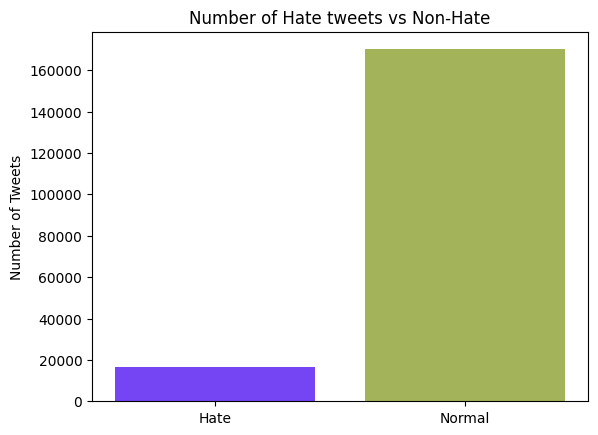

In [55]:
plot_data = [len(filter(df, hate="hate")), len(filter(df, hate="normal"))]
             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Hate tweets vs Non-Hate")
plt.xticks(range(len(plot_data)), ['Hate', 'Normal'])

[16411, 28070]


([<matplotlib.axis.XTick at 0x23bd5ad00d0>,
 [Text(0, 0, 'Hate'), Text(1, 0, 'Toxic')])

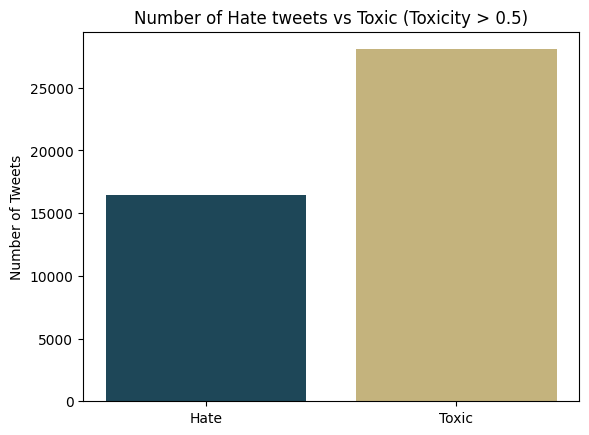

In [35]:
plot_data = [len(filter(df, hate="hate")), len(filter(df, toxicity = 0.5))]
print(plot_data) 
             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Hate tweets vs Toxic (Toxicity > 0.5)")
plt.xticks(range(len(plot_data)), ['Hate', 'Toxic'])

[16411, 28483]


([<matplotlib.axis.XTick at 0x23be8435150>,
 [Text(0, 0, 'Hate'), Text(1, 0, 'All Toxic')])

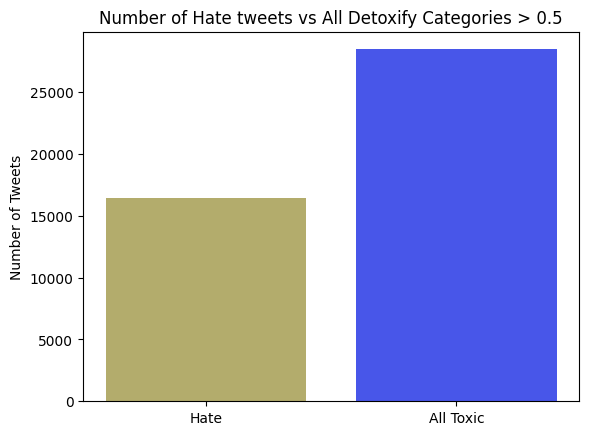

In [70]:
plot_data = [len(filter(df, hate="hate")), len(filter_ortoxic(df, toxicity=0.5, severe_toxicity=0.5, obscene=0.5, identity_attack=0.5, insult=0.5, threat=0.5, sexual_explicit=0.5))]
print(plot_data)             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Number of Hate tweets vs All Detoxify Categories > 0.5")
plt.xticks(range(len(plot_data)), ['Hate', 'All Toxic'])

[28070, 3, 9563, 4444, 15898, 237, 1392, 16411]


([<matplotlib.axis.XTick at 0x23bd5e44250>,
 [Text(0, 0, 'toxicity'),
  Text(1, 0, 'severe_toxicity'),
  Text(2, 0, 'obscene'),
  Text(3, 0, 'identity_attack'),
  Text(4, 0, 'insult'),
  Text(5, 0, 'threat'),
  Text(6, 0, 'sexual_explicit'),
  Text(7, 0, 'hate')])

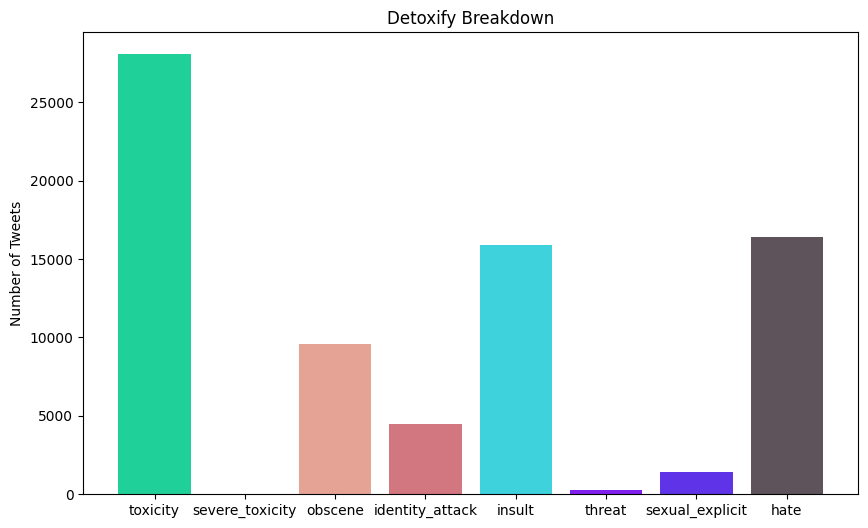

In [40]:
plt.figure(figsize=(10,6))
plot_data = [len(filter(df, toxicity=0.5)),  len(filter(df,severe_toxicity=0.5)), len(filter(df,obscene=0.5)), len(filter(df,identity_attack=0.5)), len(filter(df,insult=0.5)), len(filter(df,threat=0.5)), len(filter(df,sexual_explicit=0.5)), len(filter(df, hate="hate"))]
print(plot_data)             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Detoxify Breakdown")
plt.xticks(range(len(plot_data)), ['toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit', 'hate'])

[16411, 4490]


([<matplotlib.axis.XTick at 0x23bd55aa5c0>,
 [Text(0, 0, 'hate'), Text(1, 0, 'hate and toxic')])

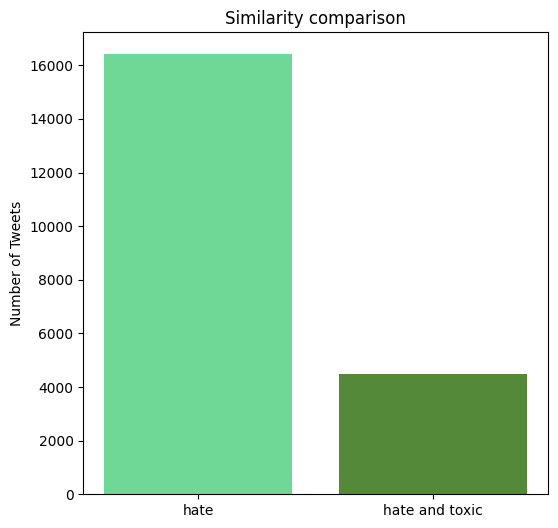

In [43]:
plt.figure(figsize=(6,6))
plot_data = [len(filter(df, hate="hate")), len(filter(df, hate="hate", toxicity=0.5))]
print(plot_data)             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Similarity comparison")
plt.xticks(range(len(plot_data)), ['hate', 'hate and toxic'])

[16411, 2345]


([<matplotlib.axis.XTick at 0x23be885e5c0>,
 [Text(0, 0, 'hate'), Text(1, 0, 'hate and insult')])

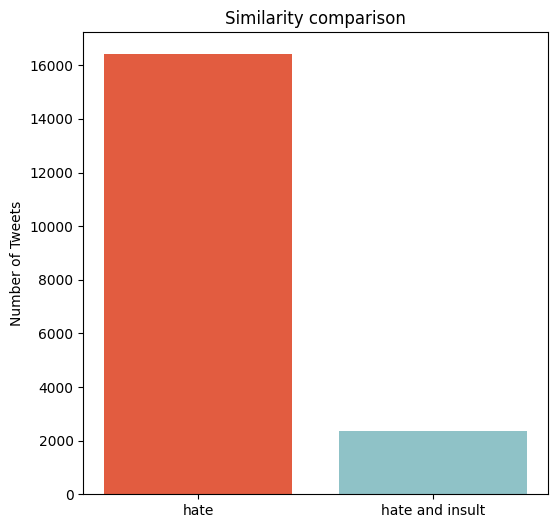

In [74]:
plt.figure(figsize=(6,6))
plot_data = [len(filter(df, hate="hate")), len(filter(df, hate="hate", insult=0.5))]
print(plot_data)             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Similarity comparison")
plt.xticks(range(len(plot_data)), ['hate', 'hate and insult'])

[16411, 841]


([<matplotlib.axis.XTick at 0x23bd5f44e80>,
 [Text(0, 0, 'hate'), Text(1, 0, 'hate and obscene')])

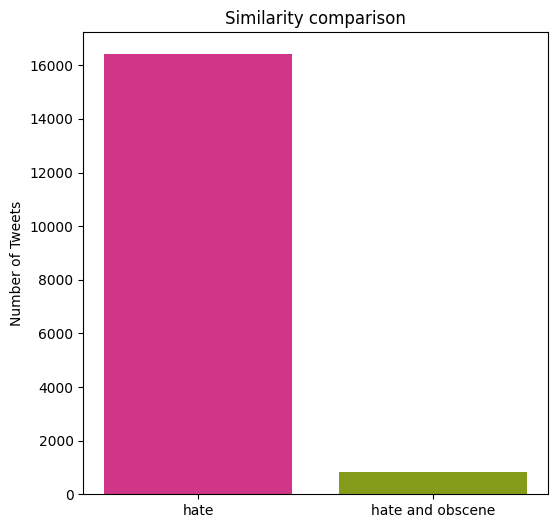

In [44]:
plt.figure(figsize=(6,6))
plot_data = [len(filter(df, hate="hate")), len(filter(df, hate="hate", obscene=0.5))]
print(plot_data)             
colors = []
for _ in range(len(plot_data)):
    colors.append((random.random(), random.random(), random.random())) 
    
plt.bar(range(len(plot_data)),plot_data, color=colors)
plt.ylabel("Number of Tweets")
plt.title("Similarity comparison")
plt.xticks(range(len(plot_data)), ['hate', 'hate and obscene'])